# Analyzing and Visualizing Experiments

Standard tools for analyzing and visualizing data:

* [matplotlib](http://matplotlib.org): Python module for generating high-quality graphs 
* [pyplot](http://matplotlib.org/api/pyplot_summary.html): wrapper for MATLAB-style plotting (nicer for interactive use)
* pylab: combines numpy and pyplot into one namespace as a kind of MATLAB replacement
* Alternatives: 
  * [Pandas](http://pandas.pydata.org/) - highly recommended
  * [Chaco](http://code.enthought.com/projects/chaco/)
  * [Mayavi](http://code.enthought.com/projects/mayavi/) (3D)
  * [PyQtGraph](http://pyqtgraph.org/) (which we will use later in the course)
  * [plot.ly](https://plot.ly/)
  * [Google Chart API](https://developers.google.com/chart/)

**Example:** You have conducted an experiment with four different input techniques comparing the *task completion time* for a certain task. Each task was repeated 11 times.
Task completion times (in seconds) were stored in the files technique1.txt, technique2.txt, technique3.txt, and technique4.txt.

In [7]:
cat technique1.txt # built-in command

4.26
5.68
7.24
4.82
6.95
8.81
8.04
8.33
10.84
7.58
9.96

## Reading in data from log files

In [8]:
t = []
for i in range(1,5):
    t.append(list(map(float, open("technique"+str(i)+".txt").readlines())))
t1,t2,t3,t4 = t

In [9]:
t1

[4.26, 5.68, 7.24, 4.82, 6.95, 8.81, 8.04, 8.33, 10.84, 7.58, 9.96]

In [10]:
ID = range(len(t1)) # just a little helper range for plotting

In [11]:
%matplotlib inline
from pylab import *
rcParams['figure.figsize'] = (16,9)

In [12]:
mean(t1), std(t1)

(7.5009090909090901, 1.9370242151086692)

In [13]:
mean(t2), std(t2)

(7.5009090909090901, 1.9371086914896203)

In [14]:
mean(t3), std(t3)

(7.5, 1.9359329439927313)

In [15]:
mean(t4), std(t4)

(3.7045454545454546, 1.5305219765364879)

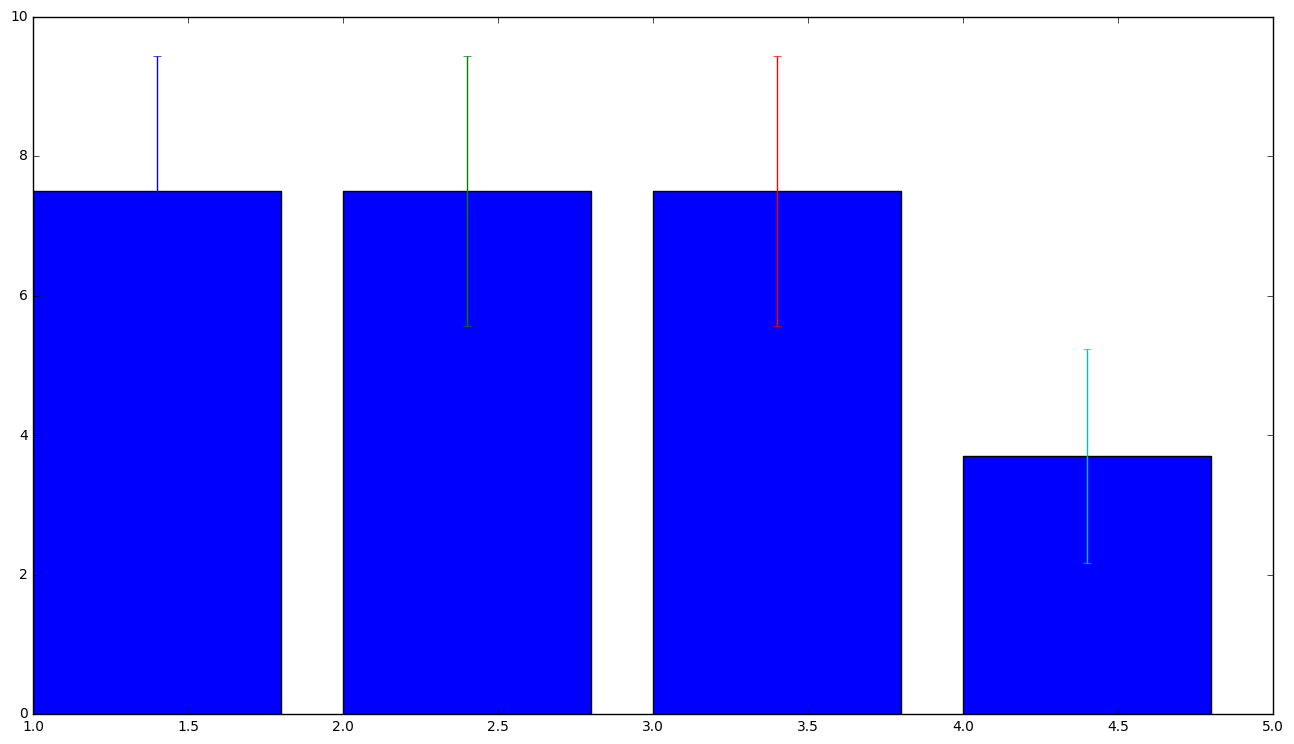

In [16]:
bar(1, mean(t1), yerr=std(t1));
bar(2, mean(t2), yerr=std(t2));
bar(3, mean(t3), yerr=std(t3));
bar(4, mean(t4), yerr=std(t4));

dataset modified from: https://en.wikipedia.org/wiki/Anscombe's_quartet

Bar graphs only display very little information about a sample. Use box plots instead:

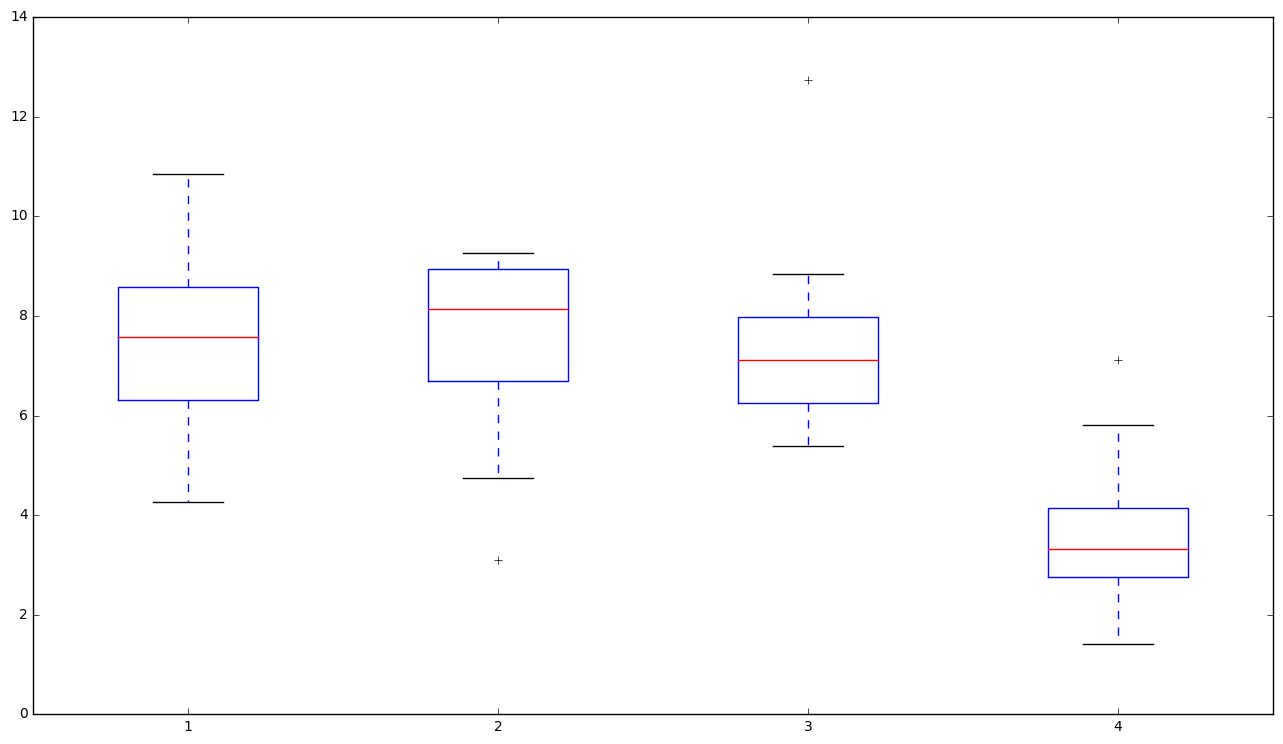

In [17]:
boxplot([t1, t2, t3, t4]);

Box plots: 

* Red line indicates *median*.
* Box indicates the second and third quartiles (divided by the median) of the data. These are also called lower/upper quartile.
* [Whiskers may indicate various ranges](https://en.wikipedia.org/wiki/Box_plot#Types_of_box_plots). 
  [With matplotlib, whiskers are placed 1.5 IQR above/below the upper/lower quartile](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)
* `+` indicates an outlier, i.e. a value that is outside the range defined by the whiskers. Defining outliers in this way is less arbitrary than deciding which values are outliers ad-hoc.

### Scatter plots for exploring your data: 

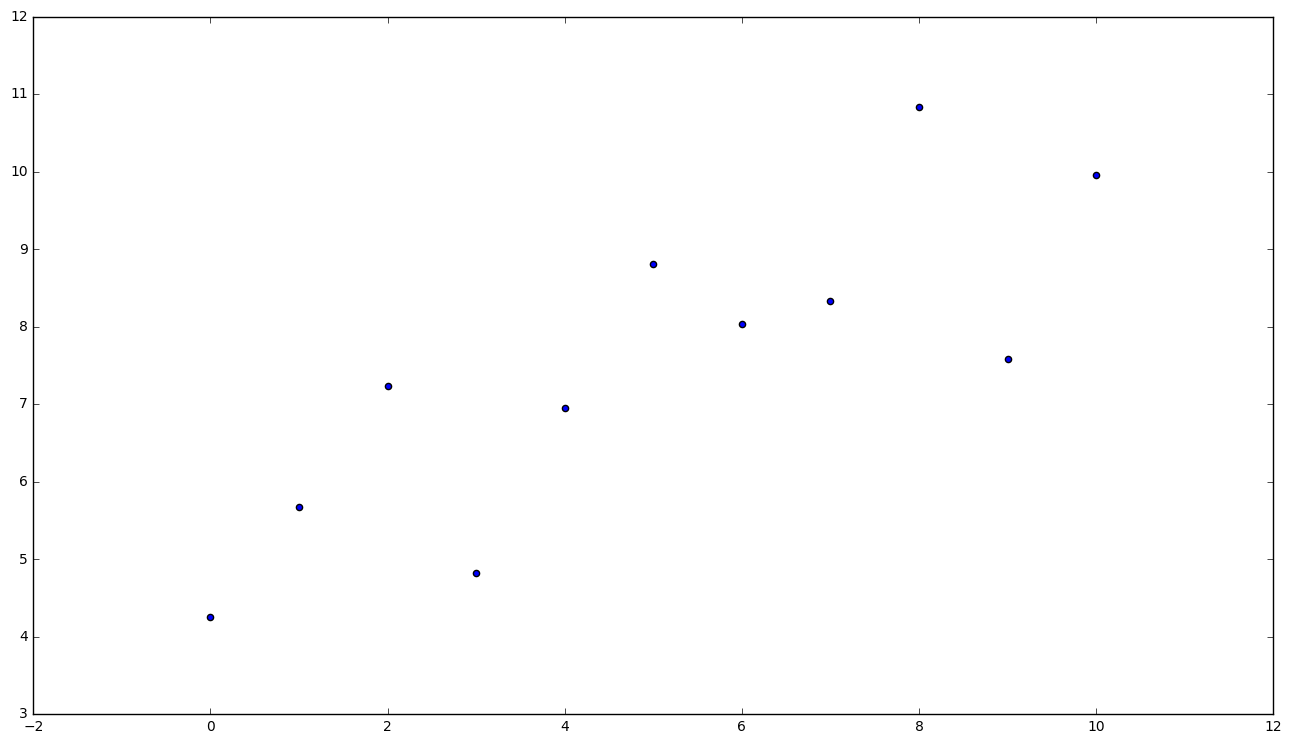

In [18]:
scatter(ID, t1)

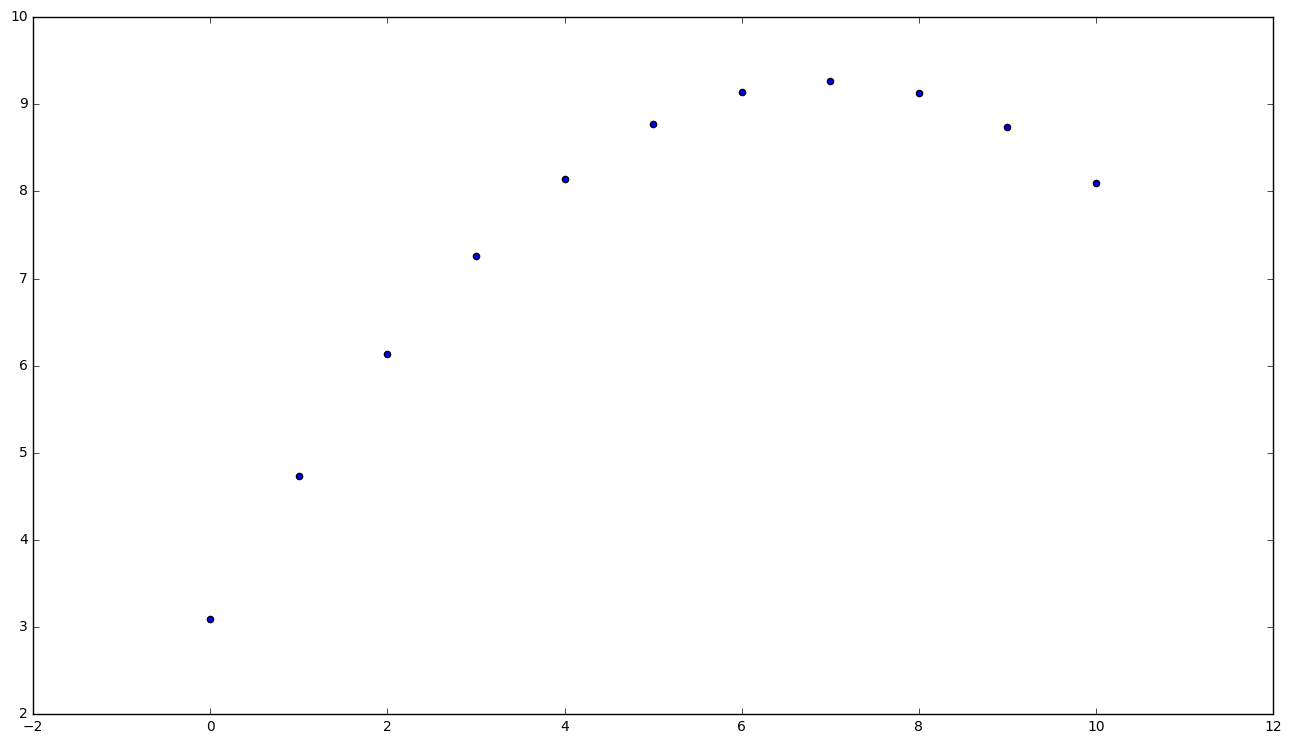

In [19]:
scatter(ID,t2)

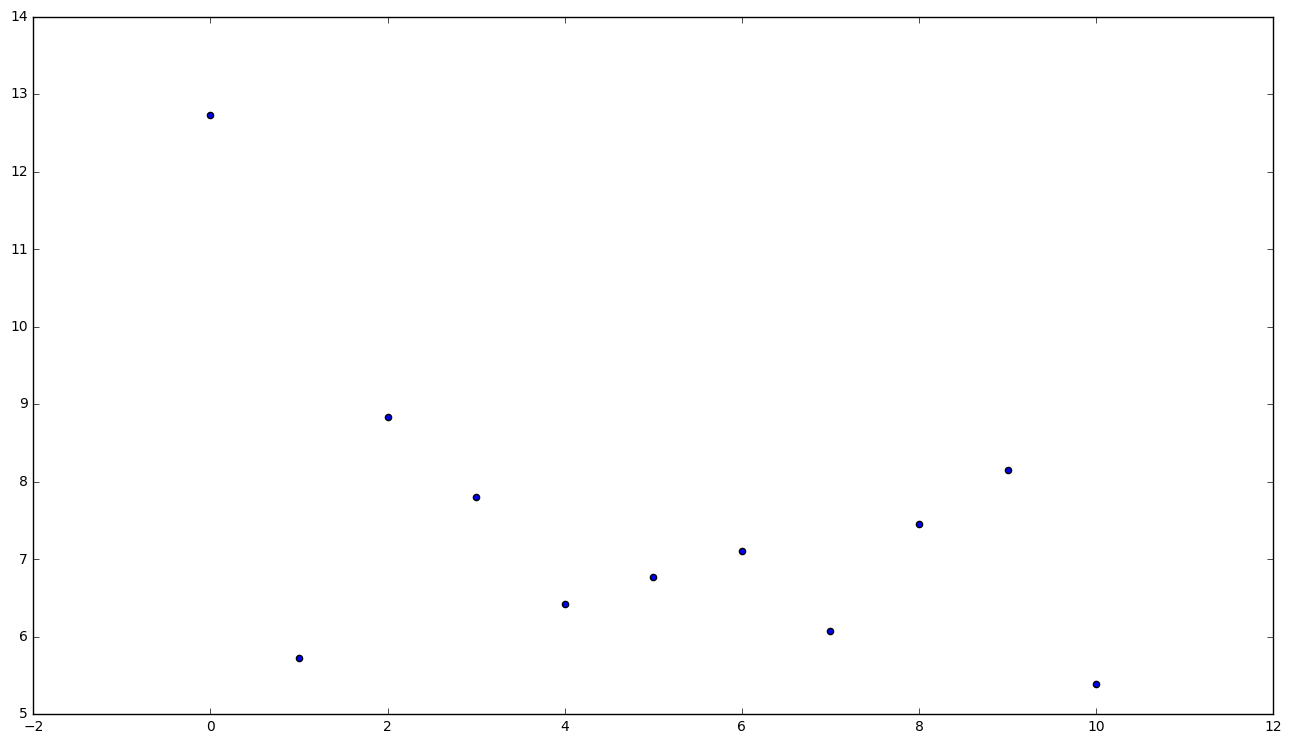

In [20]:
scatter(ID,t3)

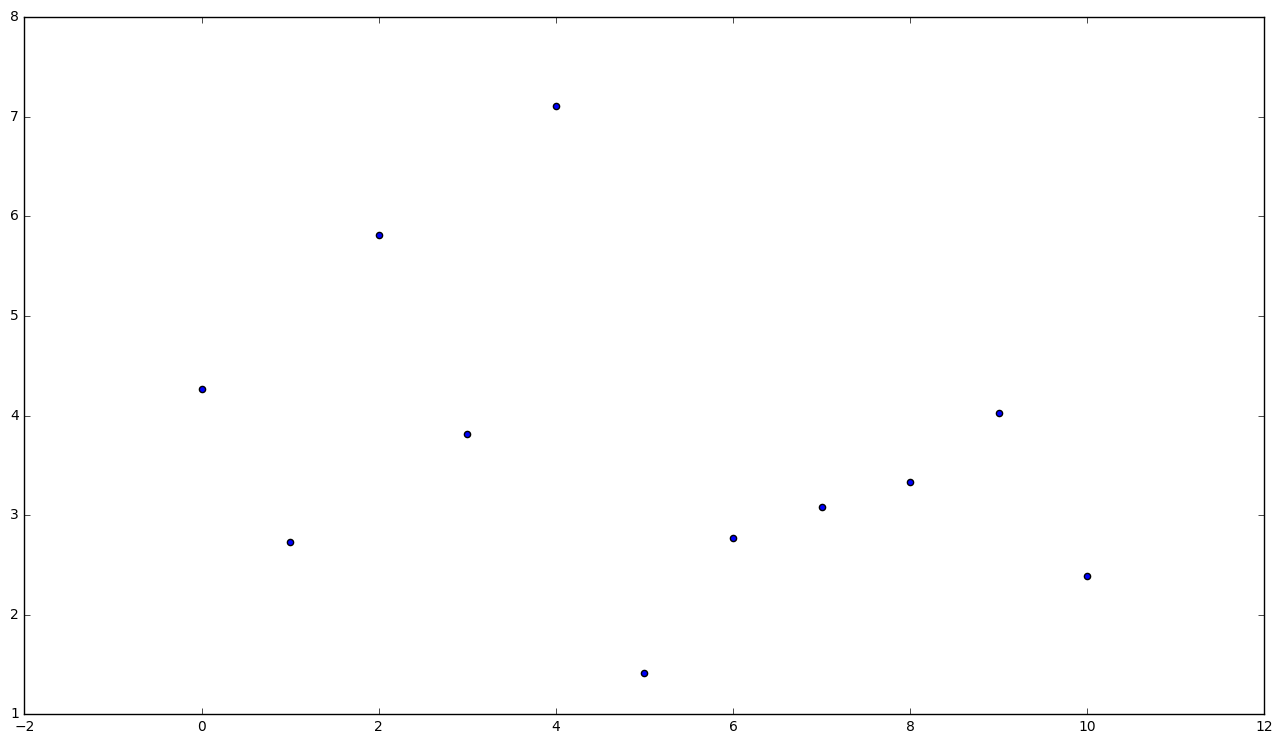

In [21]:
scatter(ID,t4)

## Inferential Statistics: t-test and linear regression

In [22]:
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

In [23]:
t_statistic, p_value = ttest_ind(t3, t4)
print("p-value: %2.30f" %(p_value))

p-value: 0.000094141940205694229788085936


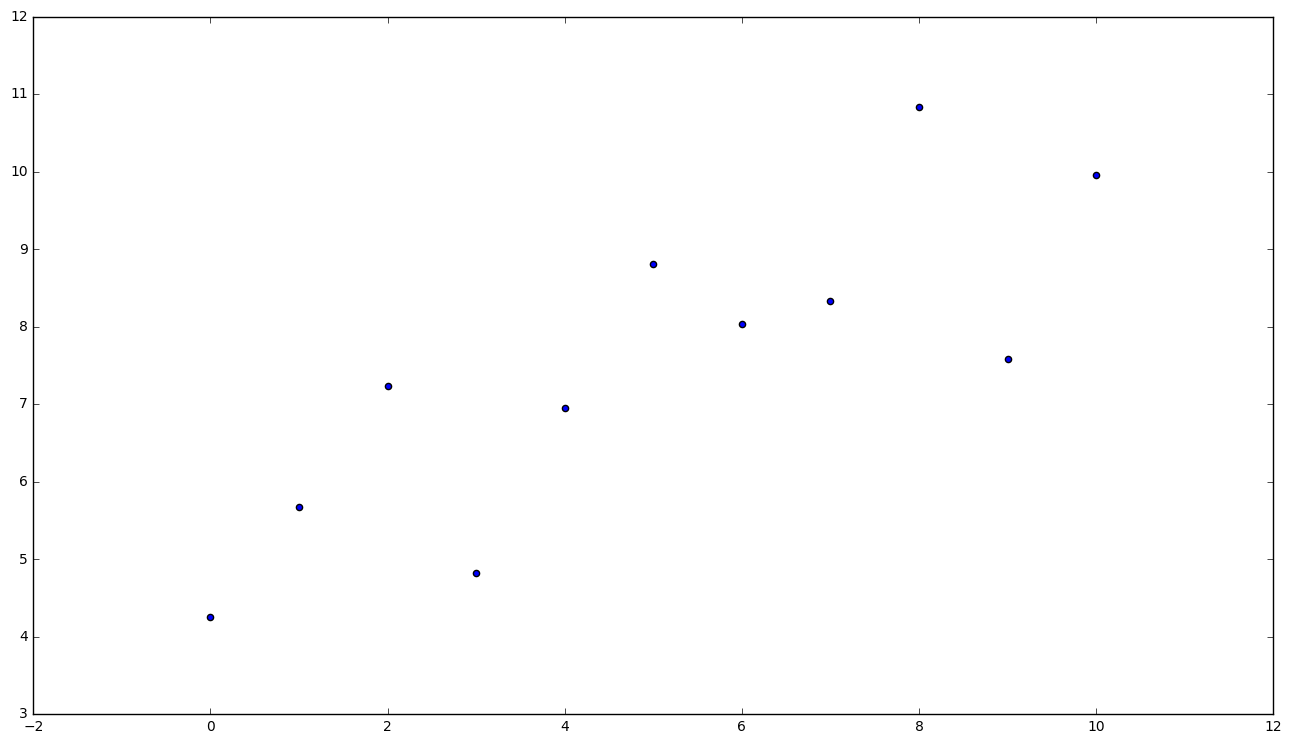

In [24]:
scatter(ID, t1)

In [25]:
b, a = polyfit(ID, t3, 1)
print("y = %f * x + %f" % (b,a))

y = -0.308909 * x + 9.044545


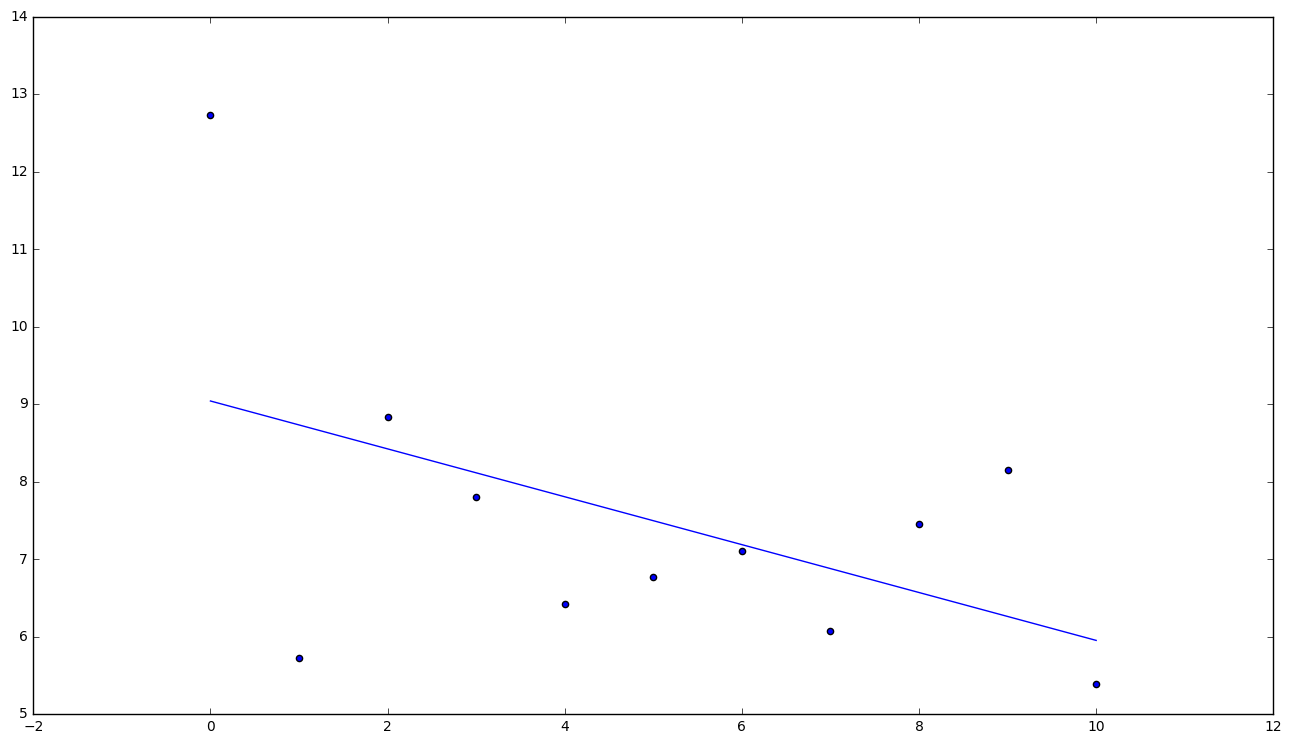

In [26]:
yr = polyval([b,a],ID)
plot(ID, yr);
scatter(ID, t3);

In [27]:
a = [80, 120, 200]  * 10
b = [100, 200, 400] * 10
_, p_value = ttest_ind(a, b)
print("p-value: %2.8f" %(p_value))

p-value: 0.00017643


## Bonus: Violin plots combine histograms and box plots

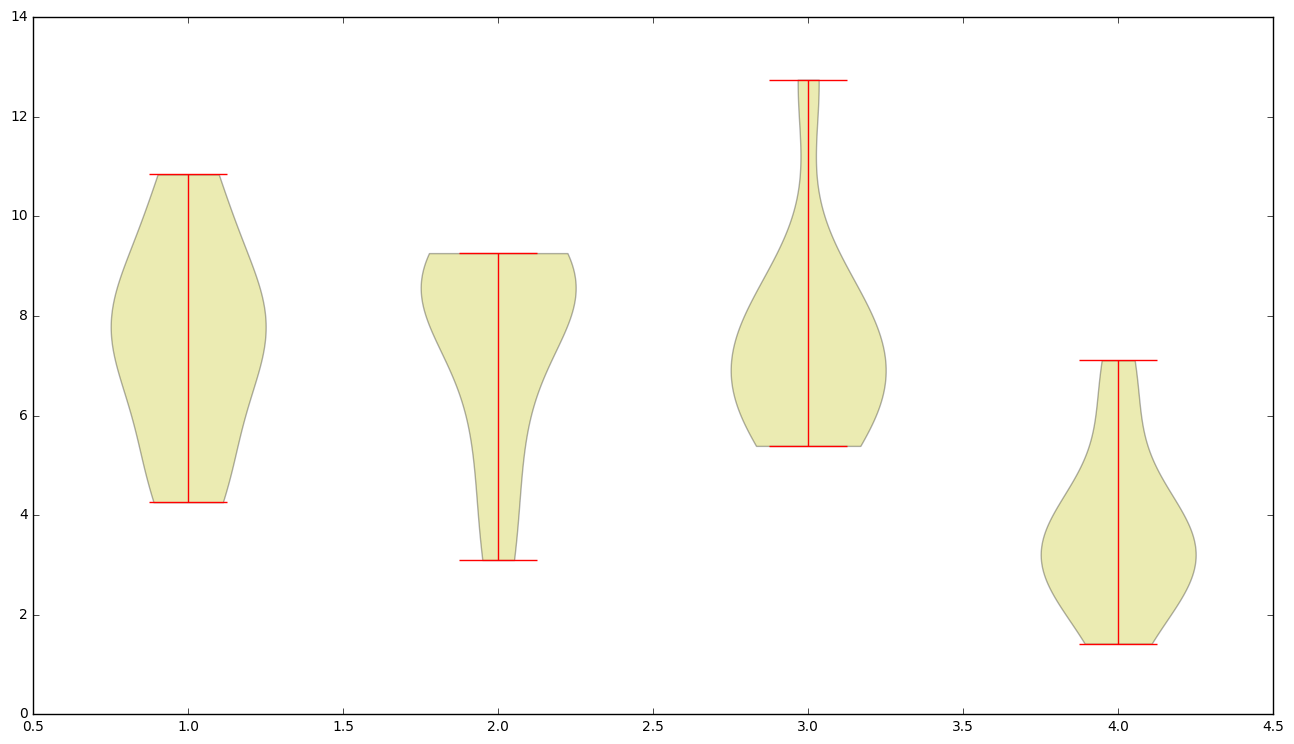

In [28]:
violinplot(t);

## Bonus: reading in data from a CSV file

In [29]:
!head test2.csv # execute shell command by prepending "!"

timestamp (ISO); user_id; trial; left_or_right_hand; stimulus_or_choice; movement_time (ms)
2014-04-23T01:31:36;1;0;l;s;2348
2014-04-23T01:31:37;1;1;l;c;729
2014-04-23T01:31:38;1;2;r;s;602
2014-04-23T01:31:39;1;3;r;c;306
2014-04-23T01:31:40;1;4;l;s;801
2014-04-23T01:31:40;1;5;l;c;608
2014-04-23T01:31:41;1;6;r;s;386
2014-04-23T01:31:42;1;7;r;c;489
2014-04-23T01:31:42;1;8;l;s;529


In [30]:
data = genfromtxt("test2.csv", dtype=None, delimiter=";", names=True)

In [31]:
data.dtype # see which data types were detected for each column ("S19" indicates a string of length 19)

dtype([('timestamp_ISO', 'S19'), ('user_id', '<i8'), ('trial', '<i8'), ('left_or_right_hand', 'S1'), ('stimulus_or_choice', 'S1'), ('movement_time_ms', '<i8')])

In [32]:
# access all values in a column
data['movement_time_ms']

array([2348,  729,  602,  306,  801,  608,  386,  489,  529,  802,  666,
        513,  385,  617,  490,  729,  520,  633, 1155,  305,  776,  962,
        890,  625,  408,  329,  521,  571, 1041,  638,  481,  825,  489,
        513,  546,  688,  633, 1102,  425,  537,  730, 1055, 1226,  562,
        393,  634,  849,  550,  441,  786,  610,  526,  662,  505, 1401,
        650,  627,  586,  440,  651,  905,  515,  749,  647])

In [33]:
# access individual record:
data[1]

(b'2014-04-23T01:31:37', 1, 1, b'l', b'c', 729)

## Bonus: displaying external images

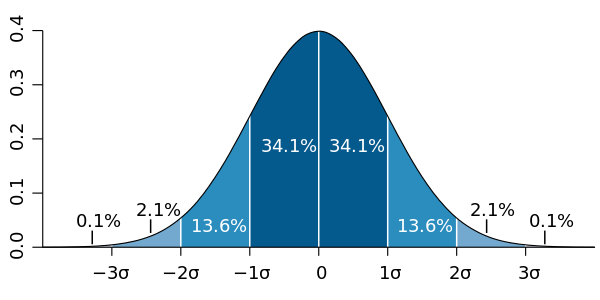

In [34]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/600px-Standard_deviation_diagram.svg.png")